In [184]:
import pandas as pd
import numpy as np

In [185]:
import sys
import importlib
sys.path.insert(0, ".")

import sql_functions as sf
from sql_functions import *
importlib.reload(sf)

<module 'sql_functions' from 'C:\\Users\\KeikoGolden\\ComputationalLiguistics\\Annotaion\\bn_nb_s\\PythonTocheckModel\\PullRequests\\.\\sql_functions.py'>

In [186]:
import yaml
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
from psycopg2.extras import execute_values

with open("config.yml") as f:
    config = yaml.safe_load(f)

In [187]:
conn = psycopg2.connect(
        database=config['db']['name'], 
        user=config['db']['user'], 
        host=config['db']['host'], 
        password=config['db']['password']
    )

cur = conn.cursor()

# 1. Data Collection

classification_id
- 0: Unrecognized (skill)
- 1: Organization
- 2: Law
- 3: job title
- 4: Certificate

In [211]:
command = """
select skills.skill,  
entity_types.entity_type as classification,
entity_types.id as classification_id
from entities
join entity_types on entities.entity_id = entity_types.id
join skills on skills.id = entities.skill_id
"""

entity_df = pd.read_sql(command, conn)
entity_df 

C:\Users\KeikoGolden\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1
1,Council for Affordable Quality Healthcare (CAQH),organization,1
2,Financial Crimes Enforcement Network (FinCEN),organization,1
3,Financial Industry Regulatory Authority (FINRA),organization,1
4,Financial Transactions and Reports Analysis Ce...,organization,1
...,...,...,...
114,US-CERT,organization,1
115,USA Patriot Act,law,2
116,Who Chemical Regulations,law,2
117,WorkSafeBC,organization,1


In [212]:
command = """
select job as skill
from jobs
"""

job_df = pd.read_sql(command, conn)
job_df 

C:\Users\KeikoGolden\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,skill
0,Staff Writer
1,Mover
2,TIG Welder
3,Model Maker
4,Chemist
...,...
3642,Reinsurance Analyst
3643,Senior Specialist - Human Design
3644,Assistant Vice President Talent Acquisition
3645,Cave Tour Guide


In [213]:
entity_df = entity_df.append(job_df)

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_4440\4112985643.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(job_df)


In [214]:
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3642,Reinsurance Analyst,NaN,NaN
3643,Senior Specialist - Human Design,NaN,NaN
3644,Assistant Vice President Talent Acquisition,NaN,NaN
3645,Cave Tour Guide,NaN,NaN


In [215]:
entity_df['classification'] = entity_df['classification'].fillna("job_title")

In [216]:
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3642,Reinsurance Analyst,job_title,NaN
3643,Senior Specialist - Human Design,job_title,NaN
3644,Assistant Vice President Talent Acquisition,job_title,NaN
3645,Cave Tour Guide,job_title,NaN


In [176]:
entity_df.classification_id.unique()

array([ 1.,  2., nan])

In [177]:
entity_df['classification_id'] = entity_df['classification_id'].fillna(3)

In [178]:
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3642,Reinsurance Analyst,job_title,3.0
3643,Senior Specialist - Human Design,job_title,3.0
3644,Assistant Vice President Talent Acquisition,job_title,3.0
3645,Cave Tour Guide,job_title,3.0


In [179]:
command = """
select skill as skill
from skills
limit(3647)
"""

skill_df = pd.read_sql(command, conn)
skill_df 

C:\Users\KeikoGolden\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,skill
0,Digital Guardian Software
1,Proofpoint Software
2,Forcepoint DLP Software
3,Netskope Security Service Edge
4,Boldon James Classifier
...,...
3642,Coursework Evaluation
3643,Court Filing
3644,Court Order Enforcement
3645,Court Security


In [180]:
entity_df = entity_df.append(skill_df)
entity_df

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_4440\910781763.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(skill_df)


,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3642,Coursework Evaluation,NaN,NaN
3643,Court Filing,NaN,NaN
3644,Court Order Enforcement,NaN,NaN
3645,Court Security,NaN,NaN


In [181]:
entity_df['classification'] = entity_df['classification'].fillna("skill")
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3642,Coursework Evaluation,skill,NaN
3643,Court Filing,skill,NaN
3644,Court Order Enforcement,skill,NaN
3645,Court Security,skill,NaN


In [182]:
entity_df['classification_id'] = entity_df['classification_id'].fillna(0)
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3642,Coursework Evaluation,skill,0.0
3643,Court Filing,skill,0.0
3644,Court Order Enforcement,skill,0.0
3645,Court Security,skill,0.0


In [20]:
conn.close()

#### Add more data on certificate and law to mach the size of data with skill and job_title

In [183]:
excel_file = pd.read_excel('C:/Users/KeikoGolden/KeikoData/credentials_laws.xlsx', sheet_name=None)

credential_df = excel_file['certificate']
law_df = excel_file['law']

In [184]:
# Remove duplicates since data was bulk colected.The shuffle by sample().
#Since certificates are clustered by regions(US federal, US state, Canada, and EU), shuffle the file couple of times.

credential_df = credential_df.drop_duplicates().sample(frac=1)
credential_df 

,skill
3907,Pilot license
1652,The Project Management Institute Agile Certifi...
107,Certified Athletic Trainer (ATC)
2767,Correctional Studies Diploma
2760,Civil Engineering Technician Diploma
...,...
3167,Nurse Practitioner (NP) license
3190,Certified Information Systems Security Profess...
3723,Master of Science (M.S.)
3922,Teacher license


In [185]:
#Same thing for laws which are clustered by regions(US federal, US state, Canada, and EU). shuffle the file couple of times.
law_df = law_df.drop_duplicates().sample(frac=1)
law_df 

,skill
171,Consumer Protection Act
249,Defend Trade Secrets Act
3034,The Common Consolidated Corporate Tax Base (CC...
3398,The Eurojust Regulation
288,Occupational Safety and Health Act of 0
...,...
3783,The EU Directive on the Provision of Audiovisu...
379,National Voter ID Act
1238,Illinois' Climate and Equitable Jobs Act
3124,The Landfill Directive


In [186]:
# append credential_df  to the training data (entity_df)
entity_df = entity_df.append(credential_df)
entity_df

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_4440\2483701272.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(credential_df)


,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3167,Nurse Practitioner (NP) license,NaN,NaN
3190,Certified Information Systems Security Profess...,NaN,NaN
3723,Master of Science (M.S.),NaN,NaN
3922,Teacher license,NaN,NaN


In [187]:
# Fill NaN in classification and classification_id for credential.
entity_df['classification'] = entity_df['classification'].fillna('certificate')
entity_df['classification_id'] = entity_df['classification_id'].fillna(4)
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3167,Nurse Practitioner (NP) license,certificate,4.0
3190,Certified Information Systems Security Profess...,certificate,4.0
3723,Master of Science (M.S.),certificate,4.0
3922,Teacher license,certificate,4.0


In [188]:
# append law_df to the training data (entity_df)
entity_df = entity_df.append(law_df)
entity_df

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_4440\1401306898.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_df = entity_df.append(law_df)


,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3783,The EU Directive on the Provision of Audiovisu...,NaN,NaN
379,National Voter ID Act,NaN,NaN
1238,Illinois' Climate and Equitable Jobs Act,NaN,NaN
3124,The Landfill Directive,NaN,NaN


In [189]:
# Fill NaN in classification and classification_id for credential.
entity_df['classification'] = entity_df['classification'].fillna('law')
entity_df['classification_id'] = entity_df['classification_id'].fillna(2)
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,1.0
1,Council for Affordable Quality Healthcare (CAQH),organization,1.0
2,Financial Crimes Enforcement Network (FinCEN),organization,1.0
3,Financial Industry Regulatory Authority (FINRA),organization,1.0
4,Financial Transactions and Reports Analysis Ce...,organization,1.0
...,...,...,...
3783,The EU Directive on the Provision of Audiovisu...,law,2.0
379,National Voter ID Act,law,2.0
1238,Illinois' Climate and Equitable Jobs Act,law,2.0
3124,The Landfill Directive,law,2.0


# 2. Create a training data

 - Skipping both Option 1 and Option 2 below: Creates training data if you don't want to make any changes to the "organization"  classified data.
 - Using Option 1 and skipping Option 2: Creates training data if you want to completely remove data classified as "organization" .
 - Skipping Option 1 and using Option 2: Creates training data with "organization" classifier replaced with "skill" classifier. (any organization tagged skill becomes a skill.)

In [82]:
# Option 1: Organizationを完全にトレーニングファイルから抜かしたい場合はこれを使う。
entity_df = entity_df[~(entity_df['classification']=='organization')]
entity_df

,skill,classification,classification_id
5,Federal Information Security Management Act (F...,law,2.0
6,General Data Protection Regulation (GDPR),law,2.0
7,Health Insurance Portability and Accountabilit...,law,2.0
8,Health Information Technology for Economic and...,law,2.0
15,National Environmental Policy Act (NEPA),law,2.0
...,...,...,...
3396,The Schengen Borders Code,law,2.0
200,Securities Act of 3,law,2.0
1158,Controlled Substances Act (CSA),law,2.0
2618,The Wind Energy Institute of Canada,law,2.0


In [190]:
# Option 2: Organizationを０に変えてスキルに組み込むにはこのスクリプトを使う。
entity_df['classification_id'] = entity_df['classification_id'].replace(1, 0)
entity_df

,skill,classification,classification_id
0,"Advisory, Conciliation and Arbitration Service...",organization,0.0
1,Council for Affordable Quality Healthcare (CAQH),organization,0.0
2,Financial Crimes Enforcement Network (FinCEN),organization,0.0
3,Financial Industry Regulatory Authority (FINRA),organization,0.0
4,Financial Transactions and Reports Analysis Ce...,organization,0.0
...,...,...,...
3783,The EU Directive on the Provision of Audiovisu...,law,2.0
379,National Voter ID Act,law,2.0
1238,Illinois' Climate and Equitable Jobs Act,law,2.0
3124,The Landfill Directive,law,2.0


In [132]:
#entity_dfをシャッフル。sample()の括弧内に「frac =1」と記述することで、DataFrame内の行をランダムに並び替える。
entity_df = entity_df.sample(frac=1)
entity_df

,skill,classification,classification_id
1831,Technical Sales Manager,job_title,3.0
3485,Steward (Operations),job_title,3.0
3623,Occupational License (e.g. for specific trades),certificate,4.0
3301,Command Post Of The Future,skill,0.0
1704,Washington Medical Marijuana Program,law,2.0
...,...,...,...
2268,Axios,skill,0.0
2474,Certified Professional Soil Scientist (CPSS),certificate,4.0
1113,Student Ambassador,job_title,3.0
3877,EU Directive on the approximation of the laws ...,law,2.0


# 3. Train & evaluate the model with Spacy vectoriser with Naïve Bayes and KNN

In [232]:
#######WHen you have physical training data, skip process 1 and 2 above (collecting data) and run this block.

#entity_df = pd.read_excel('training_added_all_skills.xlsx')
#entity_df

#entity_df = pd.read_excel("C:/Users/KeikoGolden/KeikoData/technical_soft_functional.xlsx")
#entity_df

entity_df = pd.read_excel("training_tech_fun_sft_from_sql.xlsx")
entity_df

,Unnamed: 0,skill,skill_type,classification_id
0,0,Geospatial Technology,technical,0
1,1,Google Data Studio,technical,0
2,2,Global System for Mobile Communications (GSM),technical,0
3,3,Information Systems,technical,0
4,4,ITIL Process,technical,0
...,...,...,...,...
12558,12558,AWS Auto Scaling,technical,0
12559,12559,Backtesting,technical,0
12560,12560,Bankruptcy,functional,1
12561,12561,CAPA Investigations,technical,0


In [233]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [234]:
# Create vectors.
entity_df['vector'] = entity_df['skill'].apply(lambda text: nlp(text).vector) 

In [235]:
entity_df.head(10)

,Unnamed: 0,skill,skill_type,classification_id,vector
0,0,Geospatial Technology,technical,0,"[-0.394005, -0.173585, 0.54119503, -0.2516985,..."
1,1,Google Data Studio,technical,0,"[-0.05039668, -0.0784095, -0.15030333, 0.13690..."
2,2,Global System for Mobile Communications (GSM),technical,0,"[-0.26058, 0.26945183, 0.09944624, 0.05479462,..."
3,3,Information Systems,technical,0,"[-0.413045, 0.145594, -0.026745006, -0.180185,..."
4,4,ITIL Process,technical,0,"[0.042734995, 0.18512, -0.1052775, 0.046445, 0..."
5,5,JUnit,technical,0,"[0.4684, 0.20591, -0.62978, -0.0065061, -0.991..."
6,6,Jury Instruction,functional,1,"[-0.17767149, 0.34134, 0.44524497, 0.19433, -0..."
7,7,Keynote,technical,0,"[0.047407, 0.74898, 0.29337, 0.63713, 0.37202,..."
8,8,GIS Applications,technical,0,"[-0.4741, -0.265483, 0.3776705, -0.435345, 0.1..."
9,9,Global Mapper,functional,1,"[-0.1698735, -0.037039995, 0.06870499, 0.21771..."


In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    entity_df.vector.values,  #カラム名以外にvaluesをつけないと実際にベクター値を組み込めないので注意。
    entity_df.classification_id,
    test_size=0.2,
    random_state=2022
)

In [237]:
# You need to make a 2D numpy array
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

##### Train with Naïve Bayes Classifier

In [238]:
#Saclerをつかってマイナスのベクター値をコンバートする。
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [239]:
# Take metrics.
from sklearn.metrics import classification_report

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1620
           1       0.00      0.00      0.00       856
           2       0.00      0.00      0.00        37

    accuracy                           0.64      2513
   macro avg       0.21      0.33      0.26      2513
weighted avg       0.42      0.64      0.51      2513



C:\Users\KeikoGolden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KeikoGolden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KeikoGolden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Truth')

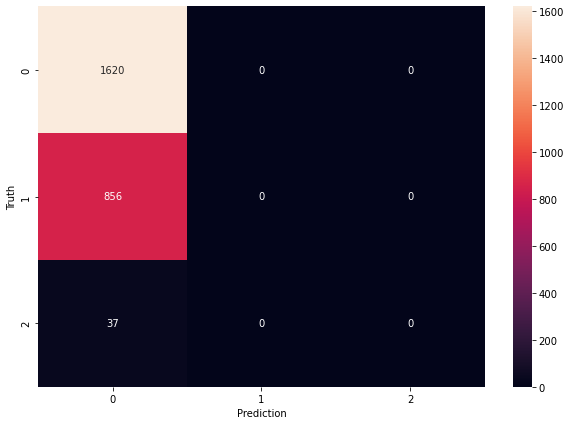

In [240]:
# Run the confusion matrix to see where and which data is confused. Adjust the training data accordingly.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

##### Train with KNeighbors Classifier

In [241]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with X_train_2d initially created above and y_train
clf2.fit(X_train_2d, y_train)

#3. get the predictions
y_pred = clf2.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1620
           1       0.64      0.54      0.59       856
           2       0.92      0.32      0.48        37

    accuracy                           0.73      2513
   macro avg       0.78      0.57      0.62      2513
weighted avg       0.73      0.73      0.73      2513



Text(69.0, 0.5, 'Truth')

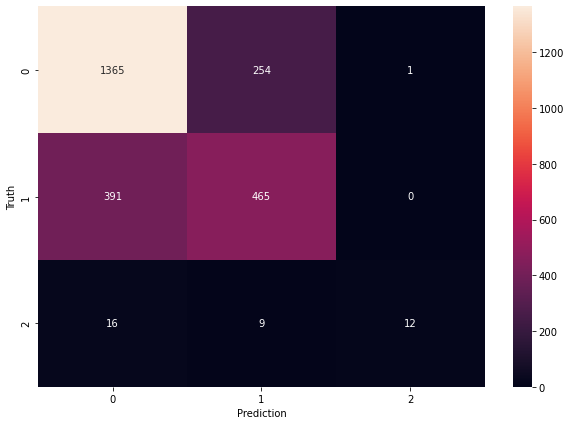

In [242]:
#Run the confusion matrix to analyse and tune the training data.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# 4. Test - Check with the list of non- sensical skills or all non approved skill

In [168]:
#non_sensical_df = pd. read_excel('KE218_non_sensical_skills.xlsx')
#non_sensical_df = pd. read_excel("C:\Users\KeikoGolden\ComputationalLiguistics\KE218\unapproved_client.parquet"')
non_sensical_df = pd. read_excel("C:/Users/KeikoGolden/KeikoData/all_non_skyhive_skills.xlsx")                              
non_sensical_df

,skill
0,ability to work under pressure
1,adaptability
2,adaptable
3,adobe acrobat
4,attention to detail
...,...
179225,zycus
179226,zylab
179227,zywave
179228,zyxel


In [169]:
non_sensical_df = non_sensical_df.dropna()

In [144]:
#non_sensical_list = non_sensical_df.non_sensical_skill.tolist()
#non_sensical_list

['Serving Food and Beverage',
 'Receiving Food and Beverage Orders',
 'Administering Tests and Exams',
 'Multi-tasking',
 'Model-view-controller',
 '.NET Framework 2',
 'Administering Local Anesthetics',
 'Advertising and Promotions Co-ordinator',
 'Angular 6',
 "Commercial Driver's License",
 'HR-Software',
 'Mac and PC platforms',
 'Unreal 3',
 'Angular 7',
 'Persian (Farsi) Language',
 'It Support Technician',
 'Vp & Director of Corporate Development',
 'Executive Director & Co-owner',
 'Math and Science Teacher in High',
 'Sales Consultant - Part-time',
 'Telephone Interviewer/Market Research',
 'Teaching Assistant Dept. of Physics and Astronomy',
 "Therapeutic Services Manager - Shepherd's Care Foundation",
 'Public Health Inspector/Health Promotion Officer',
 'Product Quality Lead - Global Product and Marketing',
 'Inside Sales Rep & Web Content Administrator',
 'Lead Contact When Booking and Negotiating Large Food and Beverage Functions',
 'Executive Assistant to the Senior Vice

In [170]:
#non_sensical_df['vector'] = non_sensical_df['non_sensical_skill'].apply(lambda text: nlp(text).vector) 
non_sensical_df['vector'] = non_sensical_df['skill'].apply(lambda text: nlp(text).vector) 

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_28364\2302030554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_sensical_df['vector'] = non_sensical_df['skill'].apply(lambda text: nlp(text).vector)


In [171]:
non_sensical_df

,skill,vector
0,ability to work under pressure,"[-0.01941805, 0.2156786, -0.0664004, 0.10071, ..."
1,adaptability,"[-0.37579, 0.61231, 0.3937, -0.45933, -0.59147..."
2,adaptable,"[-0.11729, -0.036681, -0.024693, -0.47207, 0.1..."
3,adobe acrobat,"[-0.55252504, -0.71914, 0.40541, -0.153725, -0..."
4,attention to detail,"[-0.09113333, 0.08648167, -0.25060666, -0.0114..."
...,...,...
179225,zycus,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
179226,zylab,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
179227,zywave,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
179228,zyxel,"[-0.18549, 0.23064, 0.27615, -0.13669, 0.32195..."


##### Test with NominalNB

In [120]:
import numpy as np

non_sensical_df_vector_col = non_sensical_df.vector.values

non_sensical_df_vector_col = np.stack(non_sensical_df_vector_col)

In [121]:
from sklearn.metrics import classification_report

tagged = clf.predict(non_sensical_df_vector_col)

In [122]:
#non_sensical_df['classification_tagged'] = tagged
non_sensical_df['prediction'] = tagged
non_sensical_df

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_28364\361010315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_sensical_df['prediction'] = tagged


,skill,vector,prediction
0,ability to work under pressure,"[-0.01941805, 0.2156786, -0.0664004, 0.10071, ...",3
1,adaptability,"[-0.37579, 0.61231, 0.3937, -0.45933, -0.59147...",3
2,adaptable,"[-0.11729, -0.036681, -0.024693, -0.47207, 0.1...",3
3,adobe acrobat,"[-0.55252504, -0.71914, 0.40541, -0.153725, -0...",0
4,attention to detail,"[-0.09113333, 0.08648167, -0.25060666, -0.0114...",3
...,...,...,...
179225,zycus,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
179226,zylab,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
179227,zywave,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
179228,zyxel,"[-0.18549, 0.23064, 0.27615, -0.13669, 0.32195...",0


In [123]:
result_df = pd.DataFrame({'skill':non_sensical_df.skill, 'prediction':non_sensical_df.prediction})

In [124]:
#non_sensical_df.to_excel('tagged_by_ML3.xlsx')
#non_sensical_df.to_excel('technical_functional_soft_tagged_by_ML1.xlsx')
result_df.to_excel('technical_functional_soft_tagged_by_ML5NB.xlsx')

##### Test with KNN

In [174]:
import numpy as np

non_sensical_df_vector_col = non_sensical_df.vector.values

non_sensical_df_vector_col = np.stack(non_sensical_df_vector_col)

In [173]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf2.fit(X_train_2d, y_train)

tagged2 = clf2.predict(non_sensical_df_vector_col)


KeyboardInterrupt: 

In [127]:
non_sensical_df['classification_tagged'] = tagged2
non_sensical_df

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_28364\441238653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_sensical_df['classification_tagged'] = tagged2


,skill,vector,prediction,classification_tagged
0,ability to work under pressure,"[-0.01941805, 0.2156786, -0.0664004, 0.10071, ...",3,3
1,adaptability,"[-0.37579, 0.61231, 0.3937, -0.45933, -0.59147...",3,3
2,adaptable,"[-0.11729, -0.036681, -0.024693, -0.47207, 0.1...",3,3
3,adobe acrobat,"[-0.55252504, -0.71914, 0.40541, -0.153725, -0...",0,1
4,attention to detail,"[-0.09113333, 0.08648167, -0.25060666, -0.0114...",3,3
...,...,...,...,...
179225,zycus,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
179226,zylab,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
179227,zywave,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
179228,zyxel,"[-0.18549, 0.23064, 0.27615, -0.13669, 0.32195...",0,1


In [128]:
result_df = pd.DataFrame({'skill':non_sensical_df.skill, 'prediction':non_sensical_df.classification_tagged})

In [129]:
#non_sensical_df.to_excel('tagged_by_ML4.xlsx')
result_df.to_excel('technical_fucntional_soft_tagged_by_ML5KNN.xlsx')

##### Test with KNN - show confidence score

In [175]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf2.fit(X_train_2d, y_train)

tagged2 = clf2.predict(non_sensical_df_vector_col)

# テストデータの予測値と確信度スコアを取得
predicted_probs = clf2.predict_proba(non_sensical_df_vector_col)


In [177]:
non_sensical_df['classification_tagged'] = tagged2
non_sensical_df

C:\Users\KeikoGolden\AppData\Local\Temp\ipykernel_28364\441238653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_sensical_df['classification_tagged'] = tagged2


,skill,vector,classification_tagged
0,ability to work under pressure,"[-0.01941805, 0.2156786, -0.0664004, 0.10071, ...",3
1,adaptability,"[-0.37579, 0.61231, 0.3937, -0.45933, -0.59147...",3
2,adaptable,"[-0.11729, -0.036681, -0.024693, -0.47207, 0.1...",3
3,adobe acrobat,"[-0.55252504, -0.71914, 0.40541, -0.153725, -0...",4
4,attention to detail,"[-0.09113333, 0.08648167, -0.25060666, -0.0114...",3
...,...,...,...
179225,zycus,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
179226,zylab,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
179227,zywave,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
179228,zyxel,"[-0.18549, 0.23064, 0.27615, -0.13669, 0.32195...",1


In [179]:
# 予測された確率をDataFrameに変換
predicted_probs_df = pd.DataFrame(predicted_probs, columns=['technical', 'functional', 'soft', 'cert', 'job', 'law'])

# 確率の最大値が予測されたクラスに対応するように、クラスラベルを予測値に変換
predicted_labels = predicted_probs_df.idxmax(axis=1)

# 確率と予測値を結合して最終的なデータフレームを作成
result_df1 = pd.concat([predicted_labels, predicted_probs_df], axis=1)
result_df1.columns = ['classification_tagged', 'technical', 'functional', 'soft', 'credential', 'job', 'law']

print(result_df1)

       classification_tagged  technical  functional  soft  credential  job  \
0                       soft        0.0         0.0   0.6         0.2  0.2   
1                       soft        0.0         0.0   1.0         0.0  0.0   
2                       soft        0.2         0.2   0.6         0.0  0.0   
3                       cert        0.4         0.0   0.0         0.6  0.0   
4                       soft        0.0         0.0   0.8         0.0  0.2   
...                      ...        ...         ...   ...         ...  ...   
179224                   job        0.0         0.0   0.0         0.2  0.8   
179225                   job        0.0         0.0   0.0         0.2  0.8   
179226                   job        0.0         0.0   0.0         0.2  0.8   
179227             technical        0.6         0.0   0.0         0.2  0.2   
179228             technical        0.6         0.0   0.0         0.2  0.2   

        law  
0       0.0  
1       0.0  
2       0.0  
3      

In [181]:
result_df = pd.DataFrame({'skill':non_sensical_df.skill, 'prediction':non_sensical_df.classification_tagged})
result_df['score_technical'] = result_df1['technical']
result_df['score_functional'] = result_df1['functional']
result_df['score_soft'] = result_df1['soft']
result_df['score_creden'] = result_df1['credential']
result_df['score_job'] = result_df1['job']
result_df['score_law'] = result_df1['law']
result_df

,skill,prediction,score_technical,score_functional,score_soft,score_creden,score_job,score_law
0,ability to work under pressure,3,0.0,0.0,0.6,0.2,0.2,0.0
1,adaptability,3,0.0,0.0,1.0,0.0,0.0,0.0
2,adaptable,3,0.2,0.2,0.6,0.0,0.0,0.0
3,adobe acrobat,4,0.4,0.0,0.0,0.6,0.0,0.0
4,attention to detail,3,0.0,0.0,0.8,0.0,0.2,0.0
...,...,...,...,...,...,...,...,...
179225,zycus,5,0.0,0.0,0.0,0.2,0.8,0.0
179226,zylab,5,0.0,0.0,0.0,0.2,0.8,0.0
179227,zywave,5,0.6,0.0,0.0,0.2,0.2,0.0
179228,zyxel,1,0.6,0.0,0.0,0.2,0.2,0.0


In [182]:
#result_df.to_excel('ML5_spacy_KNN_with_score.xlsx')
result_df.to_excel('ML6_spacy_KNN_with_score_job_cert_added.xlsx')

##### 以下こつ

In [ ]:
# K最近傍分類器のオブジェクトを作成
clf2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# モデルのトレーニング
clf2.fit(X_train_2d, y_train)

# テストデータの予測値と確信度スコアを取得
predicted_probs = clf2.predict_proba(non_sensical_df_vector_col)

In [133]:
# 確率スコアと予測値を印刷
print(predicted_probs)
print(clf2.predict(non_sensical_df_vector_col))

[[0.2 0.  0.  0.8 0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.2 0.2 0.6 0. ]
 ...
 [0.2 0.6 0.2 0.  0. ]
 [0.  0.8 0.2 0.  0. ]
 [0.6 0.4 0.  0.  0. ]]
[3 3 3 ... 1 1 0]


In [147]:
dup_df = pd.read_excel("C:/Users/KeikoGolden/KeikoData/credentials_laws.xlsx")
dup_df = dup_df.drop_duplicates()
dup_df.to_excel("credential_dups_removed.xlsx")

##### 以下もろもろ

In [222]:
command = """
select skills.skill,  skill_types.skill_type
from skills
join skill_types
on skills.id = skill_types.skill_id"""

tfs_training_from_sql_df = pd.read_sql(command, conn)
tfs_training_from_sql_df

C:\Users\KeikoGolden\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,skill,skill_type
0,Geospatial Technology,technical
1,Google Data Studio,technical
2,Global System for Mobile Communications (GSM),technical
3,Information Systems,technical
4,ITIL Process,technical
...,...,...
12558,AWS Auto Scaling,technical
12559,Backtesting,technical
12560,Bankruptcy,functional
12561,CAPA Investigations,technical


In [223]:
tfs_training_from_sql_df.skill_type.unique()

array(['technical', 'functional', 'soft'], dtype=object)

In [224]:
tfs_training_from_sql_df.skill_type.value_counts()

technical     7956
functional    4412
soft           195
Name: skill_type, dtype: int64

In [228]:
# make even numbers of data.
df_tech = tfs_training_from_sql_df[tfs_training_from_sql_df.skill_type=="technical"].sample(4412, random_state=2022)
df_fun = tfs_training_from_sql_df[tfs_training_from_sql_df.skill_type=="functional"]
df_sft = tfs_training_from_sql_df[tfs_training_from_sql_df.skill_type=="soft"]

In [229]:
df_balanced = pd.concat([df_tech, df_fun, df_sft],axis=0)
df_balanced.skill_type.value_counts()

technical     4412
functional    4412
soft           195
Name: skill_type, dtype: int64

In [230]:
tfs_training_from_sql_df['classification_id'] = tfs_training_from_sql_df['skill_type'].map({
    'technical': 0,
    'functional': 1, 
    'soft': 2, 
})

tfs_training_from_sql_df

,skill,skill_type,classification_id
0,Geospatial Technology,technical,0
1,Google Data Studio,technical,0
2,Global System for Mobile Communications (GSM),technical,0
3,Information Systems,technical,0
4,ITIL Process,technical,0
...,...,...,...
12558,AWS Auto Scaling,technical,0
12559,Backtesting,technical,0
12560,Bankruptcy,functional,1
12561,CAPA Investigations,technical,0


In [231]:
tfs_training_from_sql_df.to_excel('training_tech_fun_sft_from_sql.xlsx')